# 2
Given the following confusion matrix, evaluate (by hand) the model's performance.



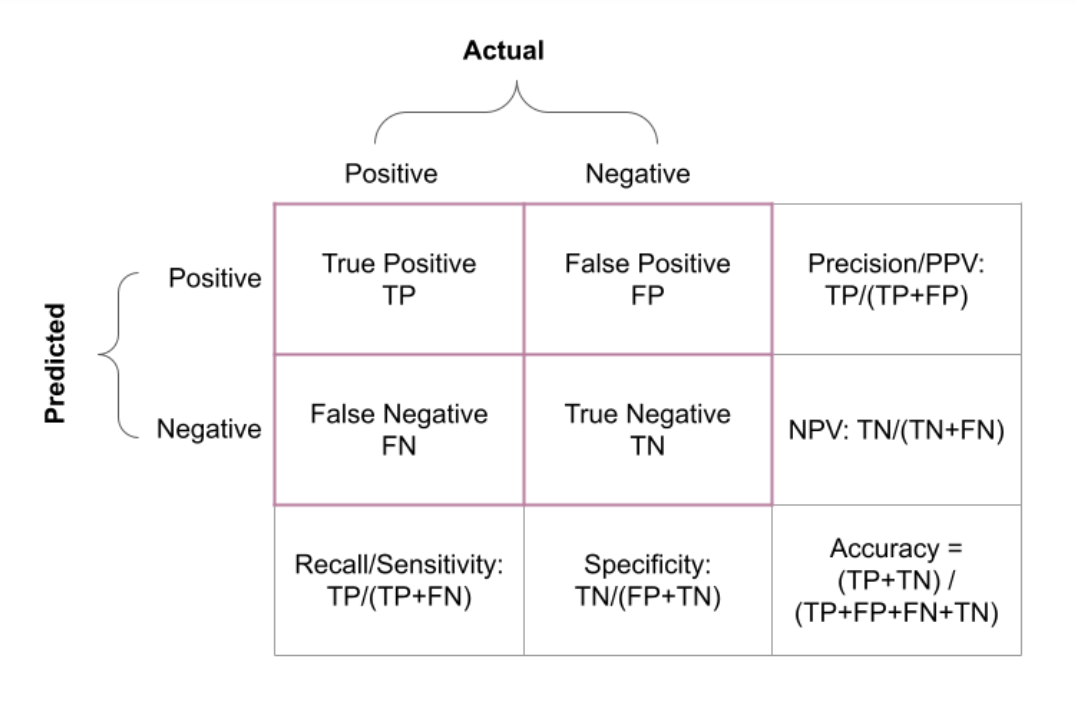

Given the following confusion matrix, evaluate (by hand) the model's performance.
Dog is positive!

|               | pred dog   | pred cat   |
|:------------  |-----------:|-----------:|
| actual dog    |     46     |      7     |
| actual cat    |     13     |     34     |

- TP: We predict dog and its a dog 46
- TN: we predict cat and its a cat 34
- FP: we predict dog and its a cat 13
- FN: we predict cat and its a dog 7
  

In [1]:
Correct_predictions = (46 + 34)
Total_predictions = (46 + 7 + 13 + 34)

print('Total_predictions =' ,Total_predictions)
print('Correct_predictions =' ,Correct_predictions)

Total_predictions = 100
Correct_predictions = 80


In [2]:
#Accuracy is simply the number of times where we got the prediction right: #overall goodness of the model
Accuracy = Correct_predictions / Total_predictions 
print('Accuracy =' , Accuracy)

Accuracy = 0.8


In [3]:
#Precision is the percentage of positive predictions that we made that are correct. #how good are our positives?
#Precision = TP / (TP + FP) #tp = true positives, fp = false positives
Precision = 46/ (46+13)
print('Precision =' , round(Precision,2))

Precision = 0.78


In [4]:
#Recall is how well we do on actually positive cases # recall with positive outcomes, specificity with negative outcomes
TP = 46 #(true positives, i.e., correctly predicted dogs) and 
FN = 7 #(false negatives, i.e., dogs predicted as cats).
Recall = TP / (TP + FN) # Recall = 46 / (46 + 7) = 0.868
print('Recall =' , round(Recall,2))


Recall = 0.87


In [5]:
# F1-score is the harmonic mean of precision and recall:
# It is a popular metric to use for classification models as it provides accurate results, 
# for both balanced and imbalanced datasets, and takes into account both the precision and recall ability of the model.
F1_score = (2 * (Precision * Recall) / (Precision + Recall))
print('F1 =' , round(F1_score,2))

F1 = 0.82


In the context of this problem, what is a false positive?


- Predicting that its a dog, when in fact it is a cat!

In the context of this problem, what is a false negative?


- Predicting that it is a cat, when in fact it is a dog!

How would you describe this model?

- This model describes predictions between dogs and cats. The model is 80% accurate with a recall score of 87%. The precision score is 78%. The model works well at predicting whether positives are actually positives.

 - FP: dog people are upset, they got a cat
 - FN: cat people are upset, they got a dog
 
 - precision... because dog people

In [14]:
import pandas as pd
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

# 3
You are working as a datascientist working for Codeup Cody Creator (C3 for short), a rubber-duck manufacturing plant.

Unfortunately, some of the rubber ducks that are produced will have defects. Your team has built several models that try to predict those defects, and the data from their predictions can be found here.

Use the predictions dataset and pandas to help answer the following questions:

In [10]:
df = pd.read_csv('duck.csv')
df.head()

,actual,model1,model2,model3
0,No Defect,No Defect,Defect,No Defect
1,No Defect,No Defect,Defect,Defect
2,No Defect,No Defect,Defect,No Defect
3,No Defect,Defect,Defect,Defect
4,No Defect,No Defect,Defect,No Defect


An internal team wants to investigate the cause of the manufacturing defects. They tell you that they want to identify as many of the ducks that have a defect as possible. 

- **What is the positive and negative case?**
    - (+): defective ducks
    - (-): no defective ducks
- **What are the possible outcomes?**
    - TP: Predict defective ducks and there are defective ducks
    - TN: Predict there are no defective ducks and there are no defective ducks
    - FP: Predict defective ducks and there are no defective ducks
    - FN: Predict there are no defective ducks and there is a defective duck
- **What are the costs of the outcomes?**
    - FP: Bad: We predict there are defective ducks and there aren't any, lose ability to research defects
    - FN: annyoying: we predict there are no defects and there are. But the client wants defects.
- **Which metric should we use?**
    - recall: we want to minimize FN, per the clients wishes

# model 1

In [11]:
pd.crosstab(df.model1, df.actual)

actual,Defect,No Defect
model1,,
Defect,8,2
No Defect,8,182


In [15]:
# Classification report
print(classification_report(df.actual, df.model1, labels=['No Defect', 'Defect']))

              precision    recall  f1-score   support

   No Defect       0.96      0.99      0.97       184
      Defect       0.80      0.50      0.62        16

    accuracy                           0.95       200
   macro avg       0.88      0.74      0.79       200
weighted avg       0.95      0.95      0.94       200



# model 2

In [12]:
pd.crosstab(df.model2, df.actual)

actual,Defect,No Defect
model2,,
Defect,9,81
No Defect,7,103


In [16]:
# Classification report
print(classification_report(df.actual, df.model2, labels=['No Defect', 'Defect']))

              precision    recall  f1-score   support

   No Defect       0.94      0.56      0.70       184
      Defect       0.10      0.56      0.17        16

    accuracy                           0.56       200
   macro avg       0.52      0.56      0.44       200
weighted avg       0.87      0.56      0.66       200



# model 3

In [13]:
pd.crosstab(df.model3, df.actual)

actual,Defect,No Defect
model3,,
Defect,13,86
No Defect,3,98


In [17]:
# Classification report
print(classification_report(df.actual, df.model3, labels=['No Defect', 'Defect']))

              precision    recall  f1-score   support

   No Defect       0.97      0.53      0.69       184
      Defect       0.13      0.81      0.23        16

    accuracy                           0.56       200
   macro avg       0.55      0.67      0.46       200
weighted avg       0.90      0.56      0.65       200



Which evaluation metric would be appropriate here? Which model would be the best fit for this use case?

- Recall would be the best evaluation method.
- Model 3 would be the best fit

Recently several stories in the local news have come out highlighting customers who received a rubber duck with a defect, and portraying C3 in a bad light. The PR team has decided to launch a program that gives customers with a defective duck a vacation to Hawaii. They need you to predict which ducks will have defects, but tell you the really don't want to accidentally give out a vacation package when the duck really doesn't have a defect. Which evaluation metric would be appropriate here? Which model would be the best fit for this use case?

What is the positive and negative case?
(+): defective ducks
(-): no defective ducks
What are the possible outcomes?
TP: Predict defective ducks and there are defective ducks
TN: Predict there are no defective ducks and there are no defective ducks
FP: Predict defective ducks and there are no defective ducks
FN: Predict there are no defective ducks and there is a defective duck
What are the costs of the outcomes?
FP: Bad: We predict there are defective ducks and there aren't any, lose ability to research defects
FN: annyoying: we predict there are no defects and there are. But the client wants defects.
Which metric should we use?
recall: we want to minimize FN, per the clients wishes

# model 1

In [26]:
pd.crosstab(df.model1, df.actual)

actual,Defect,No Defect
model1,,
Defect,8,2
No Defect,8,182


In [22]:
# Classification report
print(classification_report(df.actual, df.model1, labels=['No Defect', 'Defect']))

              precision    recall  f1-score   support

   No Defect       0.96      0.99      0.97       184
      Defect       0.80      0.50      0.62        16

    accuracy                           0.95       200
   macro avg       0.88      0.74      0.79       200
weighted avg       0.95      0.95      0.94       200



# model 2

In [20]:
pd.crosstab(df.model2, df.actual)

actual,Defect,No Defect
model2,,
Defect,9,81
No Defect,7,103


In [23]:
# Classification report
print(classification_report(df.actual, df.model2, labels=['No Defect', 'Defect']))

              precision    recall  f1-score   support

   No Defect       0.94      0.56      0.70       184
      Defect       0.10      0.56      0.17        16

    accuracy                           0.56       200
   macro avg       0.52      0.56      0.44       200
weighted avg       0.87      0.56      0.66       200



# model 3

In [21]:
pd.crosstab(df.model3, df.actual)

actual,Defect,No Defect
model3,,
Defect,13,86
No Defect,3,98


In [24]:
# Classification report
print(classification_report(df.actual, df.model3, labels=['No Defect', 'Defect']))

              precision    recall  f1-score   support

   No Defect       0.97      0.53      0.69       184
      Defect       0.13      0.81      0.23        16

    accuracy                           0.56       200
   macro avg       0.55      0.67      0.46       200
weighted avg       0.90      0.56      0.65       200



Precision on defects, model 1

# 4
You are working as a data scientist for Gives You Paws ™, a subscription based service that shows you cute pictures of dogs or cats (or both for an additional fee).

At Gives You Paws, anyone can upload pictures of their cats or dogs. The photos are then put through a two step process. First an automated algorithm tags pictures as either a cat or a dog (Phase I). Next, the photos that have been initially identified are put through another round of review, possibly with some human oversight, before being presented to the users (Phase II).

Several models have already been developed with the data, and you can find their results here.

Given this dataset, use pandas to create a baseline model (i.e. a model that just predicts the most common class) and answer the following questions:

In [29]:
df = pd.read_csv('gives_you_paws.csv')
df

,actual,model1,model2,model3,model4
0,cat,cat,dog,cat,dog
1,dog,dog,cat,cat,dog
2,dog,cat,cat,cat,dog
3,dog,dog,dog,cat,dog
4,cat,cat,cat,dog,dog
...,...,...,...,...,...
4995,dog,dog,dog,dog,dog
4996,dog,dog,cat,cat,dog
4997,dog,cat,cat,dog,dog
4998,cat,cat,cat,cat,dog


In [40]:
df['baseline'] = "dog"
df

,actual,model1,model2,model3,model4,baseline
0,cat,cat,dog,cat,dog,dog
1,dog,dog,cat,cat,dog,dog
2,dog,cat,cat,cat,dog,dog
3,dog,dog,dog,cat,dog,dog
4,cat,cat,cat,dog,dog,dog
...,...,...,...,...,...,...
4995,dog,dog,dog,dog,dog,dog
4996,dog,dog,cat,cat,dog,dog
4997,dog,cat,cat,dog,dog,dog
4998,cat,cat,cat,cat,dog,dog


# model 1

In [31]:
pd.crosstab(df.model1, df.actual)

actual,cat,dog
model1,,
cat,1423,640
dog,323,2614


In [35]:
# Classification report
print(classification_report(df.actual, df.model1, labels=['cat', 'dog']))

              precision    recall  f1-score   support

         cat       0.69      0.82      0.75      1746
         dog       0.89      0.80      0.84      3254

    accuracy                           0.81      5000
   macro avg       0.79      0.81      0.80      5000
weighted avg       0.82      0.81      0.81      5000



# model 2

In [32]:
pd.crosstab(df.model2, df.actual)

actual,cat,dog
model2,,
cat,1555,1657
dog,191,1597


In [36]:
# Classification report
print(classification_report(df.actual, df.model2, labels=['cat', 'dog']))

              precision    recall  f1-score   support

         cat       0.48      0.89      0.63      1746
         dog       0.89      0.49      0.63      3254

    accuracy                           0.63      5000
   macro avg       0.69      0.69      0.63      5000
weighted avg       0.75      0.63      0.63      5000



# model 3

In [33]:
pd.crosstab(df.model2, df.actual)

actual,cat,dog
model2,,
cat,1555,1657
dog,191,1597


In [37]:
# Classification report
print(classification_report(df.actual, df.model3, labels=['cat', 'dog']))

              precision    recall  f1-score   support

         cat       0.36      0.51      0.42      1746
         dog       0.66      0.51      0.57      3254

    accuracy                           0.51      5000
   macro avg       0.51      0.51      0.50      5000
weighted avg       0.55      0.51      0.52      5000



# model 4

In [34]:
pd.crosstab(df.model2, df.actual)

actual,cat,dog
model2,,
cat,1555,1657
dog,191,1597


In [43]:
# Classification report
print(classification_report(df.actual, df.model4, labels=['cat', 'dog']))

              precision    recall  f1-score   support

         cat       0.81      0.35      0.48      1746
         dog       0.73      0.96      0.83      3254

    accuracy                           0.74      5000
   macro avg       0.77      0.65      0.66      5000
weighted avg       0.76      0.74      0.71      5000



# Baseline

In [41]:
# Classification report
print(classification_report(df.actual, df.baseline, labels=['cat', 'dog']))

              precision    recall  f1-score   support

         cat       0.00      0.00      0.00      1746
         dog       0.65      1.00      0.79      3254

    accuracy                           0.65      5000
   macro avg       0.33      0.50      0.39      5000
weighted avg       0.42      0.65      0.51      5000



/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
print(df.columns[1])

model1


In [53]:
model_acc = []

for model in df.columns[1:]:
    acc = (df.actual == df[model]).mean()
    model_acc.append([model, acc])
model_acc


[['model1', 0.8074],
 ['model2', 0.6304],
 ['model3', 0.5096],
 ['model4', 0.7426],
 ['baseline', 0.6508]]

In [54]:
pd.DataFrame(model_acc, columns=['model', 'accuracy'])

,model,accuracy
0,model1,0.8074
1,model2,0.6304
2,model3,0.5096
3,model4,0.7426
4,baseline,0.6508


In terms of accuracy, how do the various models compare to the baseline model? Are any of the models better than the baseline?

- model 1 and model are better better than baseline in terms of accuracy
- model 1 and 4 perform better than baseline

Suppose you are working on a team that solely deals with dog pictures. Which of these models would you recommend?

- recall

- model 4

In [56]:
subset = df[df.actual == 'dog']
subset.head()

,actual,model1,model2,model3,model4,baseline
1,dog,dog,cat,cat,dog,dog
2,dog,cat,cat,cat,dog,dog
3,dog,dog,dog,cat,dog,dog
5,dog,dog,dog,dog,dog,dog
8,dog,dog,cat,dog,dog,dog


In [57]:
model_recall = []

for model in df.columns[1:]:
    recall = (subset.actual == subset[model]).mean()
    model_recall.append([model, recall])
model_recall

[['model1', 0.803318992009834],
 ['model2', 0.49078057775046097],
 ['model3', 0.5086047940995697],
 ['model4', 0.9557467732022127],
 ['baseline', 1.0]]

phase 2

In [58]:
subset1 = df[df.model1 == 'dog']
subset2 = df[df.model2 == 'dog']
subset3 = df[df.model3 == 'dog']
subset4 = df[df.model4 == 'dog']


In [59]:
(subset1.actual == subset1.model1).mean()

0.8900238338440586

In [62]:
(subset2.actual == subset2.model2).mean()

0.8931767337807607

In [63]:
(subset3.actual == subset3.model3).mean()

0.6598883572567783

In [64]:
(subset4.actual == subset4.model4).mean()

0.7312485304490948

- precision
- model 2
for precision phase 2

Suppose you are working on a team that solely deals with cat pictures. Which of these models would you recommend?

- recall
- model 2
- phase 1

- for phase 2 we want to minimize the false positives, therefore, we will use precision again.

In [67]:
#precision for phase 2
model_prec = []

for model in df.columns[1:]:
    subset = df[df[model] == 'cat']
    
    precision = (subset.actual == subset[model]).mean()
    
    model_prec.append([model, precision])
model_prec

[['model1', 0.6897721764420747],
 ['model2', 0.4841220423412204],
 ['model3', 0.358346709470305],
 ['model4', 0.8072289156626506],
 ['baseline', nan]]

- model 4 for precision

In [42]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

# 5
Follow the links below to read the documentation about each function, then apply those functions to the data from the previous problem.

sklearn.metrics.accuracy_score

In [44]:
accuracy_score(df.actual, df.model1)

0.8074

sklearn.metrics.precision_score

In [47]:
precision_score(df.actual, df.model1, labels=['cat', 'dog'],
            average = None)

array([0.68977218, 0.89002383])

sklearn.metrics.recall_score

In [48]:
recall_score(df.actual, df.model1, labels=['cat', 'dog'],
            average = None)

array([0.81500573, 0.80331899])

sklearn.metrics.classification_report

In [74]:

pd.DataFrame(classification_report(df.actual, df.model1, labels=['cat', 'dog'], output_dict = True)).T

,precision,recall,f1-score,support
cat,0.689772,0.815006,0.747178,1746.0000
dog,0.890024,0.803319,0.844452,3254.0000
accuracy,0.807400,0.807400,0.807400,0.8074
macro avg,0.789898,0.809162,0.795815,5000.0000
weighted avg,0.820096,0.807400,0.810484,5000.0000


In [75]:
def calculate_precision(predictions, positive='dog'):
    '''
    This function will: 
    - take in a model prediction 
    - defaulted pos class is dog
    - output the precision score
    '''
    return precision_score(df.actual, predictions, pos_label=positive)

In [76]:
def calculate_recall(predictions, positive='dog'):
    '''
    This function will: 
    - take in a model prediction 
    - defaulted pos class is dog
    - output the recall score
    '''
    return recall_score(df.actual, predictions, pos_label=positive)

In [ ]:
pd.concat([
    df.loc[:, 'model1':'baseline'].apply(calculate_recall).rename('recall'),
    df.loc[:, 'model1':'baseline'].apply(calculate_precision).rename('precision')
])